In [1]:
from dateutil.relativedelta import relativedelta
from datetime import datetime, timedelta
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import numpy as np
import os

In [2]:
ROOT_PATH = '/'.join(os.getcwd().split('/')[:-2])
DATA_PATH = f'{ROOT_PATH}/doodle/data/kakao3.csv'
FONT_PATH = f'{ROOT_PATH}/doodle/data/fonts/NanumMyeongjo.ttf'

In [3]:
font = font_manager.FontProperties(fname = FONT_PATH).get_name()
rc('font', family = font)

In [4]:
df = pd.read_csv(DATA_PATH)
df.head()

,Date,User,Message
0,2022-10-02 00:09:37,킹갓 캐푸형아,이모티콘
1,2022-10-03 14:38:59,김종민,캐푸형아 나 궁금한거 있어
2,2022-10-03 14:39:23,김종민,꼬물이도 발바닥 창문 같은거에 대고 있을때
3,2022-10-03 14:39:35,김종민,얘 손처럼 나와!?
4,2022-10-03 14:48:57,킹갓 캐푸형아,앜ㅋㅋㄱㅋㅋㅋㅋㅋㅋ


In [5]:
def change_name(df):
    
    df['User'][df['User'] == '킹갓 캐푸형아'] = '김캐푸'
    df['User'][df['User'] == '스탄 형니므']   = '손스탄'
    df['User'][df['User'] == '걸우 눈나']    = '임걸우'
    df['User'][df['User'] == '김땡꼬똥꼬']    = '김땡꼬'
    df['User'][df['User'] == '김종민']       = '김둘기'
    
    return df

def date_time_split(df):
    
    df['Time'] = df['Date'].str.split(' ').str[1]
    df['Date'] = df['Date'].str.split(' ').str[0]
    
    return df

In [6]:
def data_search(df, src_date, period = '1 month'):
    
    condition = ['month' in period, 'year' in period]
    method    = relativedelta if any(condition) else timedelta
    
    first_idx = df[df['Date'] == src_date].first_valid_index()
    pass

In [7]:
df = date_time_split(change_name(df))
df.head()

,Date,User,Message,Time
0,2022-10-02,김캐푸,이모티콘,00:09:37
1,2022-10-03,김둘기,캐푸형아 나 궁금한거 있어,14:38:59
2,2022-10-03,김둘기,꼬물이도 발바닥 창문 같은거에 대고 있을때,14:39:23
3,2022-10-03,김둘기,얘 손처럼 나와!?,14:39:35
4,2022-10-03,김캐푸,앜ㅋㅋㄱㅋㅋㅋㅋㅋㅋ,14:48:57


In [8]:
user_dist = Counter(list(df['User']))
user_dist

Counter({'김캐푸': 10519, '김둘기': 12383, '김땡꼬': 5355, '임걸우': 7767, '손스탄': 1371})

(0.0, 13383.0)

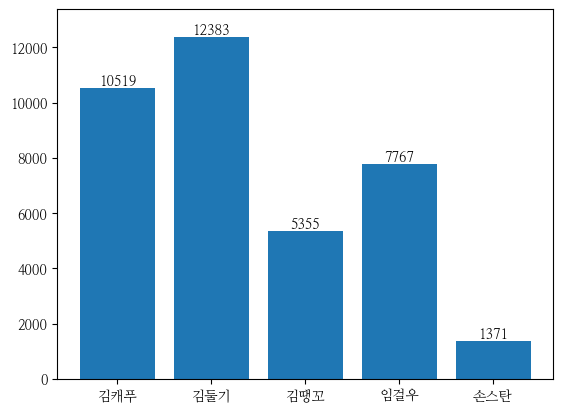

In [9]:
plt.bar(user_dist.keys(), user_dist.values())
for k, v in user_dist.items():
    
    plt.text(k, v, v, va = 'bottom', ha = 'center')
    
plt.ylim(0, max(user_dist.values()) + 1000)

<BarContainer object of 24 artists>

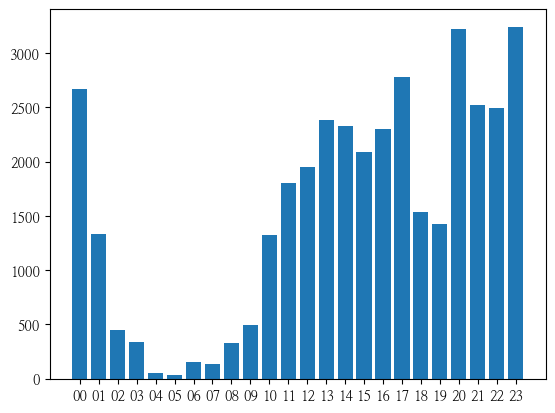

In [10]:
time_dist = dict(Counter(df['Time'].str.split(':').str[0]))
time_dist = dict(sorted(time_dist.items()))
plt.bar(time_dist.keys(), time_dist.values())

(0.0, 14244.0)

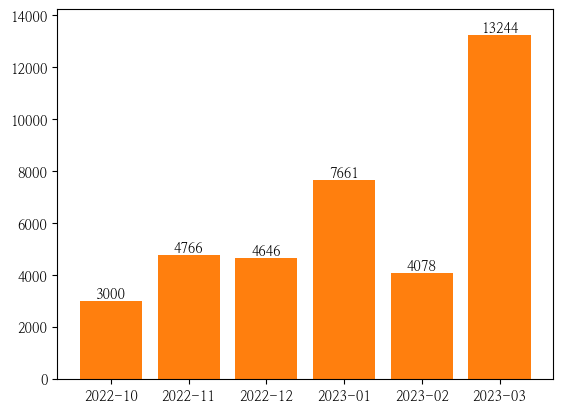

In [11]:
month_dist = dict(Counter(df['Date'].str.split('-').str[:2].str.join('-')))
month_dist = dict(sorted(month_dist.items()))
plt.bar(month_dist.keys(), month_dist.values())

plt.bar(month_dist.keys(), month_dist.values())
for k, v in month_dist.items():
    
    plt.text(k, v, v, va = 'bottom', ha = 'center')
    
plt.ylim(0, max(month_dist.values()) + 1000)

In [12]:
from wordcloud import WordCloud
from konlpy.tag import Okt
from PIL import Image

In [13]:
wordcloud = WordCloud(
        font_path = FONT_PATH,
        width     = 800, height = 800,
    )

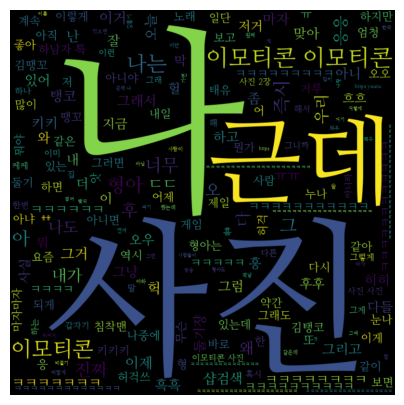

In [14]:
text    = " ".join(df['Message']).replace('이모티콘', '이모티콘')
keyword = wordcloud.generate(text)
array   = keyword.to_array()

plt.figure(figsize = (5, 5))
plt.imshow( array, interpolation='bilinear')
plt.axis(False)
plt.show()